In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

log_file_path = '../results/scalability-offrobot.log'

# Estrarre righe dal file e creare un DataFrame
data = []
pattern = r'Configuration: {"goal": "(?P<dispositions>\d+) dispositions, (?P<conditions>\d+) activated conditions.*?Test counter: (?P<test_counter>\d+).*?Negotiation time: (?P<time>\d+\.\d+) seconds. Rounds: (?P<rounds>\d+).*?'

with open(log_file_path, 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            dispositions = int(match.group("dispositions"))
            conditions = int(match.group("conditions"))
            rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
            time = float(match.group("time"))
            data.append({"dispositions": dispositions, "conditions": conditions, "rounds":rounds, "negotiation_time": time})

# Creare il DataFrame
df = pd.DataFrame(data)
df.head()

,dispositions,conditions,rounds,negotiation_time
0,25,10,3,0.177
1,25,10,3,0.233
2,25,10,2,0.081
3,25,10,2,0.110
4,25,10,2,0.112


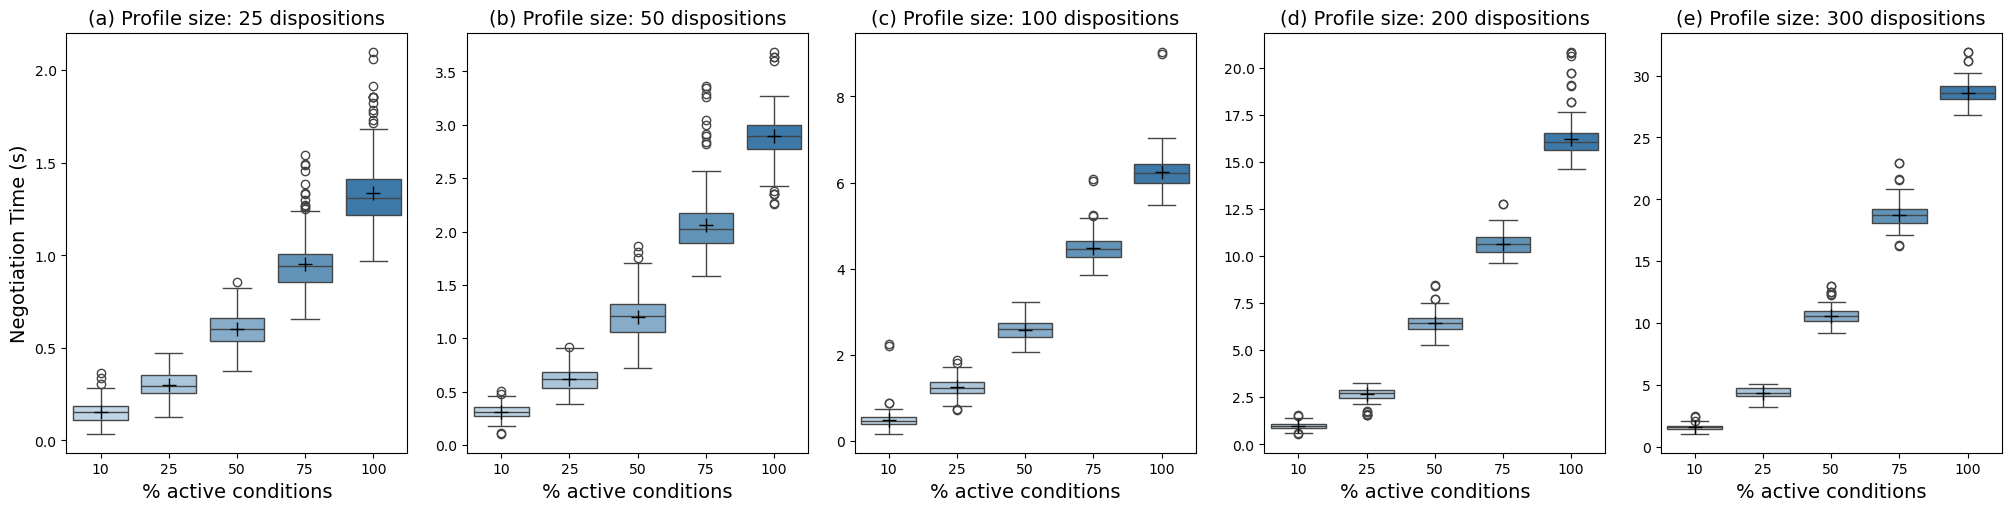

In [2]:
# Configurazioni grafiche
#sns.set(style="whitegrid")

# Creare una copia del dataframe senza le righe in cui dispositions è uguale a 500
plotting_df = df[(df["dispositions"] != 500)]

# Otteniamo i valori unici di dispositions e conditions
dispositions_list = plotting_df["dispositions"].unique()
conditions_list = plotting_df["conditions"].unique()

# Configurazione figure
num_dispositions = len(dispositions_list)
num_conditions = len(conditions_list)
# fig, axes = plt.subplots(2, max(num_dispositions, num_conditions), figsize=(20, 10), constrained_layout=True)
fig, axes = plt.subplots(1, max(num_dispositions, num_conditions), figsize=(20, 5), constrained_layout=True)

# Prima riga: Grafici per disposizioni
chart_counter = 0
for i, dispositions in enumerate(sorted(dispositions_list)):
    # ax = axes[0, i] if i < num_dispositions else None
    ax = axes[i] if i < num_dispositions else None
    if ax:
        subset = plotting_df[plotting_df["dispositions"] == dispositions]
        sns.boxplot(data=subset, x="conditions", y="negotiation_time", ax=ax, palette="blend:#bad6eb,#2b7bba", hue="conditions", legend=False, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}
            )
        ax.set_title(f"({['a', 'b', 'c', 'd', 'e'][chart_counter]}) Profile size: {dispositions} dispositions", fontsize=14)
        ax.set_xlabel("% active conditions", fontsize=14)
        if i == 0:
            ax.set_ylabel("Negotiation Time (s)", fontsize=14)
        else:
            ax.set_ylabel(" ")
        chart_counter += 1
    else:
        pass

# for i, conditions in enumerate(sorted(conditions_list)):
#     ax = axes[1, i] if i < num_conditions else None
#     if ax:
#         subset = plotting_df[plotting_df["conditions"] == conditions]
#         sns.boxplot(data=subset, x="dispositions", y="negotiation_time", ax=ax, palette="blend:#bce4b5,#2c944c", hue="dispositions", legend=False, showmeans=True,
#             meanprops={"marker": "+",
#                        "markeredgecolor": "black",
#                        "markersize": "10"}
#             )
#         ax.set_title(f"\n ({['f', 'g', 'h', 'i', 'j'][chart_counter%5]}) {conditions}% active conditions", fontsize=14)
#         ax.set_xlabel("Profile size", fontsize=14)
#         if i == 0:
#             ax.set_ylabel("Negotiation Time (s)", fontsize=14)
#         else:
#             ax.set_ylabel(" ")
#         chart_counter +=1
#     else:
#         pass


In [3]:
# Calcolare il valore medio di negotiation_time per ciascuna combinazione di dispositions e conditions
mean_negotiation_time = plotting_df.groupby(['dispositions', 'conditions'])['negotiation_time'].mean().reset_index()

mean_negotiation_time

,dispositions,conditions,negotiation_time
0,25,10,0.153935
1,25,25,0.300440
2,25,50,0.600170
3,25,75,0.953580
4,25,100,1.338915
5,50,10,0.310225
6,50,25,0.613370
7,50,50,1.197825
8,50,75,2.062425
9,50,100,2.894940


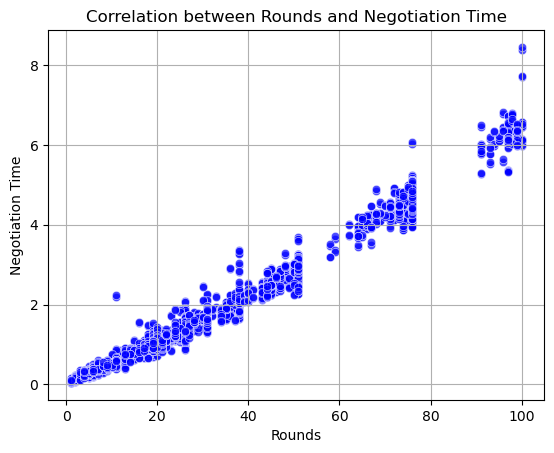

In [4]:
sns.scatterplot(data=plotting_df[(plotting_df["rounds"] <= 100) & (plotting_df["negotiation_time"] < 60)], x='rounds', y='negotiation_time', color="blue", alpha=0.7)
plt.title('Correlation between Rounds and Negotiation Time')
plt.xlabel('Rounds')
plt.ylabel('Negotiation Time')
plt.grid(True)
plt.show()

In [5]:
# Aggiungere una nuova colonna 'product' al dataframe
offers_df = df[(df["dispositions"] != 500)]
offers_df['offers'] = plotting_df['dispositions'] * plotting_df['conditions'] * 0.01
offers_df

/var/folders/fw/n2pm2wss0g3294k9bwthxd6h0000gn/T/ipykernel_98594/2742655193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df['offers'] = plotting_df['dispositions'] * plotting_df['conditions'] * 0.01


,dispositions,conditions,rounds,negotiation_time,offers
0,25,10,3,0.177,2.5
1,25,10,3,0.233,2.5
2,25,10,2,0.081,2.5
3,25,10,2,0.110,2.5
4,25,10,2,0.112,2.5
...,...,...,...,...,...
4995,300,100,301,28.437,300.0
4996,300,100,301,28.271,300.0
4997,300,100,301,28.309,300.0
4998,300,100,301,27.148,300.0


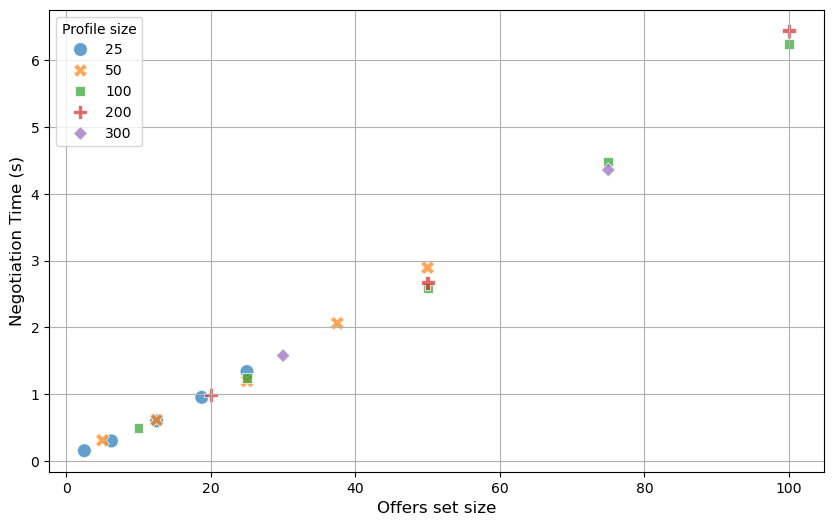

In [6]:
# Creare un grafico di dispersione per mostrare la correlazione
# Calcolare il valore medio di negotiation_time per ciascuna combinazione di dispositions, conditions e rounds
mean_negotiation_time = offers_df.groupby(['dispositions', 'conditions', 'offers'])['negotiation_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_negotiation_time[(mean_negotiation_time["offers"] <= 100)], x='offers', y='negotiation_time', hue='dispositions', style='dispositions', palette='tab10', alpha=0.7, s=100)
plt.xlabel('Offers set size', fontsize=12)
plt.ylabel('Negotiation Time (s)', fontsize=12)
plt.grid(True)
plt.legend(title='Profile size')
plt.show()

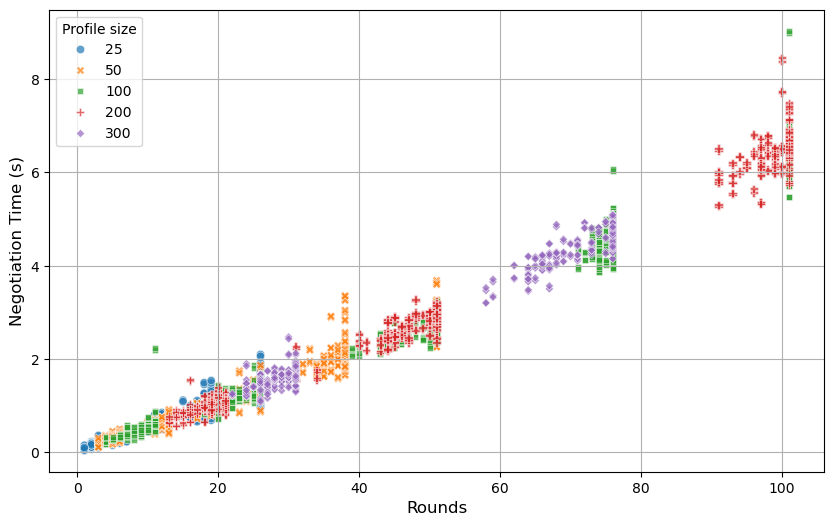

In [7]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=plotting_df[(plotting_df["rounds"] <= 101) & (plotting_df["negotiation_time"] < 60)], 
                          x='rounds', y='negotiation_time', hue='dispositions', style='dispositions', palette='tab10', alpha=0.7)
# plt.title('Correlation between Negotiation Time and Rounds colored by Dispositions')
plt.xlabel('Rounds', fontsize=12)
plt.ylabel('Negotiation Time (s)', fontsize=12)
plt.legend(title='Profile size')
plt.grid(True)
plt.show()

Runs with negotiation time <= 3 seconds: 3117 (62.34%) over 5000 runs


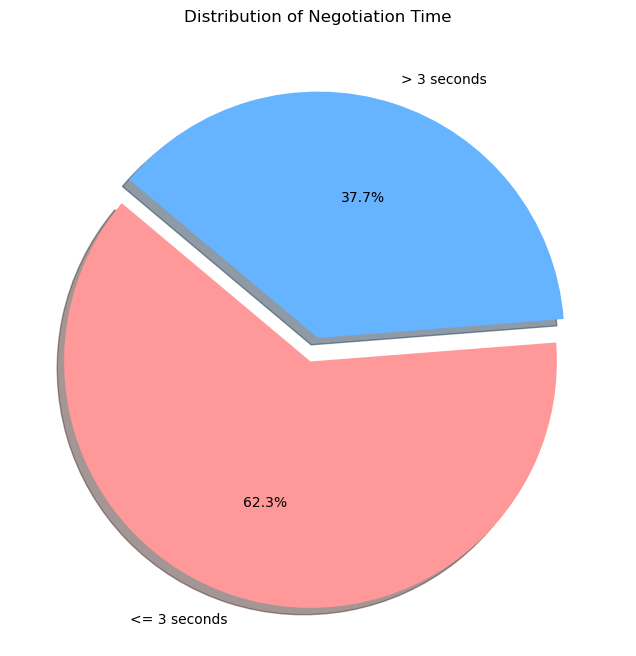

In [8]:
# Calcolare il numero di volte in cui il negotiation_time è inferiore o uguale a 3
count_less_equal_3 = plotting_df[plotting_df['negotiation_time'] <= 3].shape[0]
count_total = plotting_df.shape[0]
count_greater_3 = count_total - count_less_equal_3

print(f"Runs with negotiation time <= 3 seconds: {count_less_equal_3} ({count_less_equal_3/count_total*100:.2f}%) over {count_total} runs")

# Creare i dati per il grafico a torta
labels = ['<= 3 seconds', '> 3 seconds']
sizes = [count_less_equal_3, count_greater_3]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" the 1st slice

# Creare il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Negotiation Time')
plt.show()

Runs with negotiation time <= 3 seconds: 2542 (84.73%) over 3000 runs


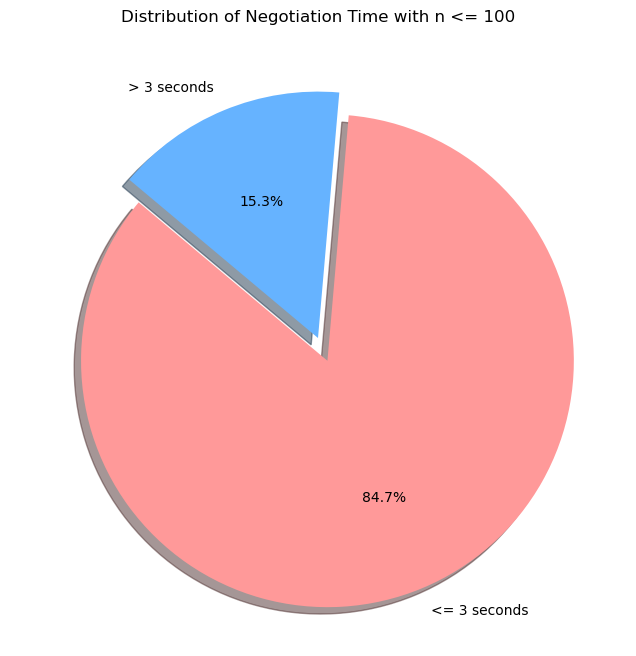

In [26]:
# Calcolare il numero di volte in cui il negotiation_time è inferiore o uguale a 3
count_less_equal_3 = plotting_df[(plotting_df['negotiation_time'] <= 3) & (plotting_df['dispositions'] <= 100)].shape[0]
count_total = plotting_df[plotting_df['dispositions'] <= 100].shape[0]
count_greater_3 = count_total - count_less_equal_3

print(f"Runs with negotiation time <= 3 seconds: {count_less_equal_3} ({count_less_equal_3/count_total*100:.2f}%) over {count_total} runs")

# Creare i dati per il grafico a torta
labels = ['<= 3 seconds', '> 3 seconds']
sizes = [count_less_equal_3, count_greater_3]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" the 1st slice

# Creare il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Negotiation Time with n <= 100')
plt.show()